In [1]:
# %config InlineBackend.figure_formats = ['svg']

In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [2]:
import seaborn_figure_settings

In [3]:
save_dpath = os.path.join('../notebooks/figures/', 'reruns')
os.makedirs(save_dpath,exist_ok=True)

In [4]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [5]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [6]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#84dcc6', '#426b69', '#9b7874', '#b191ff', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0)]

In [7]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]
vorder1_labels = ['Versatile vPro','Non-Versatile vPro',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [8]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [10]:
import os
import glob
dpath = '../results/rerun_sensitivity/'
dpath2 = '../results/final/het/'

#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [11]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/rerun_sensitivity/versatile_vpros_rerun_het_BP14.csv init
../results/rerun_sensitivity/versatile_vpros_rerun_het_DIN800.csv init
../results/rerun_sensitivity/versatile_vpros_rerun_het_CP13.csv init
../results/rerun_sensitivity/versatile_vpros_rerun_het_DOC160.csv init
../results/rerun_sensitivity/versatile_vpros_rerun_het_BP05.csv init


In [37]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    category = fname.replace('../results/rerun_sensitivity/predicted_classes_','').replace('.csv.gz','')
    
    df['category'] = category
    df['Phase'] = 'init'
    df.loc[df['run_id'].str.contains('_extend_'), 'Phase'] = 'extend'
    
    #df['Phase'] = category
    return df
predicted_classes_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'predicted_classes_*'))], ignore_index=True)


../results/rerun_sensitivity/predicted_classes_rerun_het_DIN800.csv.gz init
../results/rerun_sensitivity/predicted_classes_rerun_het_CP13.csv.gz init
../results/rerun_sensitivity/predicted_classes_rerun_het_BP14.csv.gz init
../results/rerun_sensitivity/predicted_classes_rerun_het_BP05.csv.gz init
../results/rerun_sensitivity/predicted_classes_rerun_het_DOC160.csv.gz init


In [38]:
predicted_classes_df.head()

,run_id,y_pred,max_prob,idx,media,which,model,hash,VPRO,Sample,full name,Group,RMSE_Bptotal[N],RMSE_Bptotal[C],compare_points,RMSE,RMSE_filled,category,Phase
0,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,Strong,0.987396,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,lowN,all,EXOENZYME,h8519271514136708373,vpro_11_62_EXOENZYME_C1,5x5_6A0,A. mediterranea AltDE,Strong,39.990735,201.615908,74.0,8062.768350,8062.768350,rerun_het_DIN800,init
1,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,Strong,0.990871,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,lowN,all,EXOENZYME,h8519271514136708373,vpro_13_69_EXOENZYME_C1,5B0,Pseudoalteromonas haloplanktis,Strong,8.153565,63.420126,74.0,517.100126,517.100126,rerun_het_DIN800,init
2,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,Neutral,0.986950,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,lowN,all,EXOENZYME,h8519271514136708373,vpro_17_89_EXOENZYME_C2,1B0,Axenic,Axenic,39.375696,168.877612,74.0,6649.673453,6649.673453,rerun_het_DIN800,init
3,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,Neutral,0.986950,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,lowN,all,EXOENZYME,h8519271514136708373,vpro_17_89_EXOENZYME_C2,1B0,Axenic,Axenic,39.556385,170.162638,74.0,6731.018821,6731.018821,rerun_het_DIN800,init
4,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,Strong,0.991178,rerun_het_DIN800_monte_EXOENZYME_100_monte_vpr...,lowN,all,EXOENZYME,h8519271514136708373,vpro_19_83_EXOENZYME_C1,5x5_11A0,A. mediterranea AltDE1,Strong,6.787837,59.966251,74.0,407.041121,407.041121,rerun_het_DIN800,init


In [39]:
predicted_classes_df['Phase'].value_counts()


Phase
extend    722410
init       89134
Name: count, dtype: int64

In [41]:
predicted_classes_df[['category', 'Phase']].value_counts()


category          Phase 
rerun_het_BP05    extend    145550
rerun_het_CP13    extend    145199
rerun_het_BP14    extend    145179
rerun_het_DIN800  extend    143484
rerun_het_DOC160  extend    142998
rerun_het_CP13    init       17918
rerun_het_BP14    init       17886
rerun_het_BP05    init       17820
rerun_het_DIN800  init       17757
rerun_het_DOC160  init       17753
Name: count, dtype: int64

In [42]:
predicted_classes_df.VPRO = predicted_classes_df.VPRO.str.replace('_monte_', '' ,regex=False)


In [43]:
def find_versatile_vpros(df_predicted_classes):
    vpro_df = df_predicted_classes.pivot_table(
        columns = 'y_pred',
        index=['model', 'VPRO', 'category', 'Phase'],
        values='run_id', 
        aggfunc='count', fill_value=0,
    )

    poscolumns = [c for c in ['Strong','Sustained'] if c in vpro_df.columns]
    negcolumns = [c for c in ['Inhibited','Weak'] if c in vpro_df.columns]
    if poscolumns:
        vpro_df['pos_interaction'] = vpro_df[poscolumns].sum(axis=1) 
    else:
        vpro_df['pos_interaction'] = 0

    if negcolumns:
        vpro_df['neg_interaction'] = vpro_df[negcolumns].sum(axis=1)
    else:
        vpro_df['neg_interaction'] = 0
                 
    vpro_df['Versatile'] = vpro_df['pos_interaction'].ge(1) & vpro_df['neg_interaction'].ge(1) 
    vpro_df = vpro_df.reset_index()

    return vpro_df


In [44]:
vpro_df = find_versatile_vpros(predicted_classes_df)

In [45]:
vpro_df

y_pred,model,VPRO,category,Phase,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile
0,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_BP05,init,0,35,4,0,67,60,67,60,True
1,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_BP14,init,0,4,13,0,60,90,60,90,True
2,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_CP13,init,0,19,10,0,61,76,61,76,True
3,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_DIN800,init,0,39,48,79,1,0,80,0,False
4,EXOENZYME,vpro_11_62_EXOENZYME_C1,rerun_het_DOC160,init,0,19,6,0,62,79,62,79,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18110,ROS,vpro_97_23_ROS_C1,rerun_het_BP05,init,0,0,0,0,0,55,0,55,False
18111,ROS,vpro_97_23_ROS_C1,rerun_het_BP14,init,0,0,0,0,0,55,0,55,False
18112,ROS,vpro_97_23_ROS_C1,rerun_het_CP13,init,0,0,0,0,0,55,0,55,False
18113,ROS,vpro_97_23_ROS_C1,rerun_het_DIN800,init,0,5,0,0,9,40,9,40,True


In [46]:
vpro_df['Versatile'] = vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1)

In [47]:
vpro_df['simulations_per_VPRO']  = vpro_df[gorder].sum(axis=1)

In [48]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
#vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [49]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

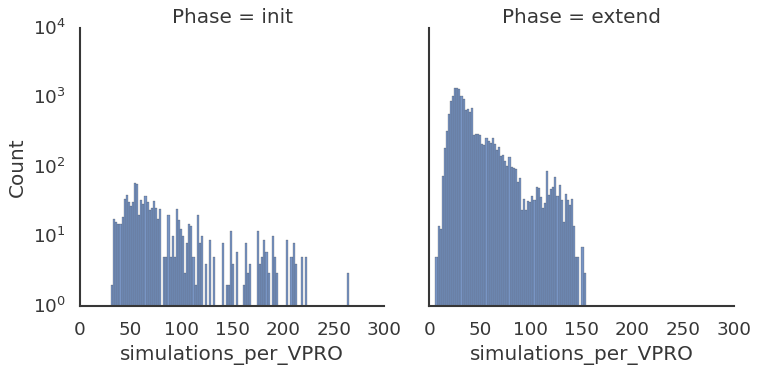

In [50]:
sns.set_context('talk')
sns.displot(
    data=vpro_df,
    col='Phase', 
    x='simulations_per_VPRO',
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False),
).set(yscale='log')

In [51]:
vpro_df.groupby('Versatile_STR').simulations_per_VPRO.describe().T

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
count,16241.00000,1874.000000
mean,40.33280,83.510672
std,24.12691,35.370635
min,4.00000,13.000000
25%,26.00000,59.000000
50%,32.00000,71.000000
75%,46.00000,108.000000
max,264.00000,265.000000


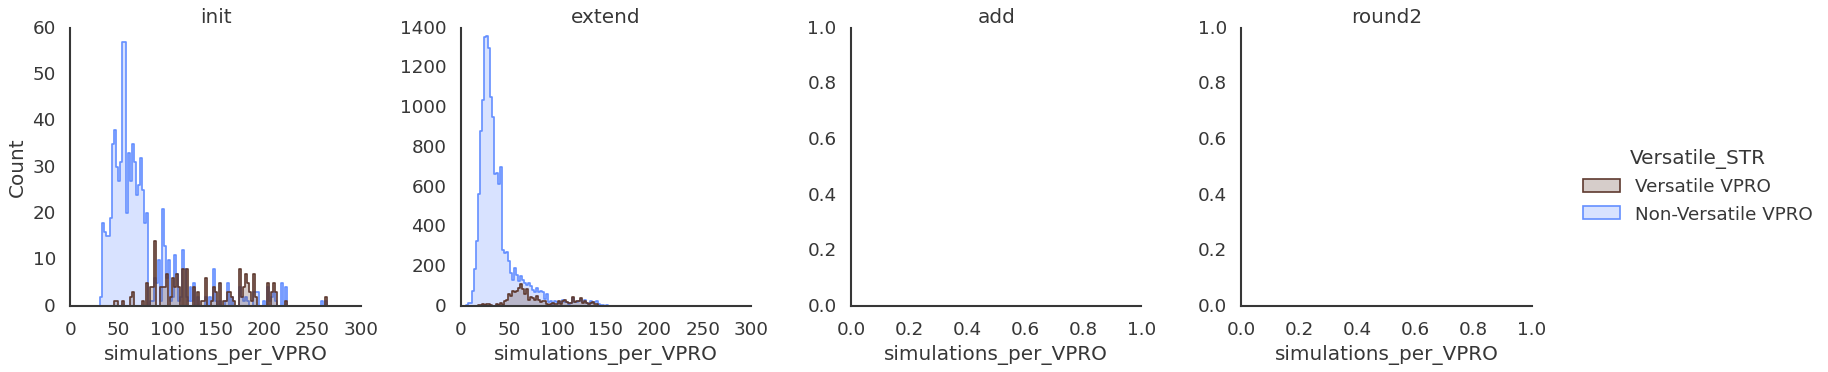

In [52]:
sns.set_context('talk')
g = sns.displot(
    data=vpro_df,
    col='Phase', col_order=['init', 'extend', 'add', 'round2'],
    hue='Versatile_STR', palette=vpalette1, hue_order=vorder1,
    x='simulations_per_VPRO', #multiple='stack',
    element='step', #fill=False,
    
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False, sharey=False),
)#.set(yscale='log').
g.set_titles(col_template='{col_name}')

In [54]:
count_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.model.isin(morder)].groupby(['category', 'model'])[gorder].sum().reset_index()

count_df

y_pred,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,rerun_het_BP05,EXOENZYME,563,9531,459,6303,29091,4407
1,rerun_het_BP05,MIXOTROPH,0,25,2054,14688,19406,123
2,rerun_het_BP05,OVERFLOW,73,1395,1523,17144,30835,1122
3,rerun_het_BP05,ROS,600,81,335,14745,5888,866
4,rerun_het_BP14,EXOENZYME,1128,7242,0,13055,20332,9032
5,rerun_het_BP14,MIXOTROPH,0,3,25,24503,11656,246
6,rerun_het_BP14,OVERFLOW,119,845,0,29944,17903,2428
7,rerun_het_BP14,ROS,518,1,5,18709,2159,1096
8,rerun_het_CP13,EXOENZYME,736,8423,3,10397,24089,7166
9,rerun_het_CP13,MIXOTROPH,0,10,40,21416,14906,190


In [55]:
count_init_df = vpro_df.loc[vpro_df.Phase.isin(['init'])& vpro_df.model.isin(morder)].groupby(['category', 'model'])[gorder].sum().reset_index()

count_init_df

y_pred,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,rerun_het_BP05,EXOENZYME,34,1827,46,658,3108,560
1,rerun_het_BP05,MIXOTROPH,0,0,164,978,1234,0
2,rerun_het_BP05,OVERFLOW,3,212,315,1010,3251,102
3,rerun_het_BP05,ROS,196,28,19,1252,569,141
4,rerun_het_BP14,EXOENZYME,113,1552,0,1284,2113,1246
5,rerun_het_BP14,MIXOTROPH,0,0,0,1520,854,0
6,rerun_het_BP14,OVERFLOW,7,152,0,2502,1973,251
7,rerun_het_BP14,ROS,181,0,0,1673,157,192
8,rerun_het_CP13,EXOENZYME,59,1691,0,1027,2587,942
9,rerun_het_CP13,MIXOTROPH,0,0,0,1348,1036,0


In [56]:
count_ver_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.Versatile].groupby(['model', 'category'])[gorder].sum().reset_index()
count_ver_df



y_pred,model,category,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,EXOENZYME,rerun_het_BP05,2,4355,150,2101,4825,1148
1,EXOENZYME,rerun_het_BP14,385,5895,0,3567,4746,4604
2,EXOENZYME,rerun_het_CP13,54,5692,2,3091,5228,3118
3,EXOENZYME,rerun_het_DIN800,442,0,0,32,184,296
4,EXOENZYME,rerun_het_DOC160,185,7174,9,3710,6456,3675
5,MIN,rerun_het_DIN800,0,47,0,17,47,0
6,MIXOTROPH,rerun_het_BP05,0,22,0,21,166,83
7,MIXOTROPH,rerun_het_BP14,0,3,0,37,46,54
8,MIXOTROPH,rerun_het_CP13,0,10,0,58,156,90
9,MIXOTROPH,rerun_het_DIN800,8,10,22,4,17,7


In [57]:
count_ver_init_df = vpro_df.loc[vpro_df.Phase.isin(['init', ]) & vpro_df.Versatile].groupby(['category','model'])[gorder].sum().reset_index()
count_ver_init_df



y_pred,category,model,Strong,Sustained,Inhibited,Weak,Neutral,Other
0,rerun_het_BP05,EXOENZYME,0,1072,46,353,1160,282
1,rerun_het_BP05,OVERFLOW,2,185,149,518,1520,57
2,rerun_het_BP14,EXOENZYME,76,1304,0,795,908,917
3,rerun_het_BP14,OVERFLOW,7,152,0,1217,912,194
4,rerun_het_BP14,ROS,181,0,0,3,2,78
5,rerun_het_CP13,EXOENZYME,7,1164,0,615,975,629
6,rerun_het_CP13,OVERFLOW,5,174,0,962,1287,158
7,rerun_het_CP13,ROS,189,8,0,1,2,65
8,rerun_het_DIN800,MIN,0,47,0,17,47,0
9,rerun_het_DIN800,OVERFLOW,11,5,0,53,121,98


In [58]:
count_init_df.loc[count_init_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)

model
EXOENZYME    31396
MIXOTROPH    11827
OVERFLOW     24430
ROS          10922
dtype: int64

In [59]:
sns.set_context('paper')

In [39]:
vcount_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend'])
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [40]:
vcount_df = vcount_df.reindex(columns=vorder1)
vcount_df = vcount_df.sort_values(by=vorder1,ascending=False)

In [43]:
vcount1_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [44]:
vcount1_init_df = vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [45]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'MIXOTROPH',
       'OVERFLOW', 'EXOENZYME', 'ROS'],
      dtype='object')

In [60]:
vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
model,,
EXOENZYME,133,82
MIXOTROPH,175,0
OVERFLOW,173,102
ROS,145,5


In [61]:
vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO     571
MIXOTROPH  Versatile VPRO      21
OVERFLOW   Versatile VPRO    1186
ROS        Versatile VPRO      94
dtype: int64

In [62]:
vpro_df.loc[
        vpro_df.Phase.isin(['init',]) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO     82
OVERFLOW   Versatile VPRO    102
ROS        Versatile VPRO      5
dtype: int64

In [63]:
t= vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
        
].groupby(['model'])[['simulations_per_VPRO', 'pos_interaction', 'neg_interaction', 'Neutral', 'Weak']].sum()
t['% pos'] = t['pos_interaction'] / t['simulations_per_VPRO'] 
t['% neg'] = t['neg_interaction'] / t['simulations_per_VPRO'] 
t['% neutral'] = t['Neutral'] / t['simulations_per_VPRO'] 
t['% Weak'] = t['Weak'] / t['simulations_per_VPRO'] 
t['% Weak/neutral'] = (t['Weak'] + t['Neutral']) / t['simulations_per_VPRO'] 

t

y_pred,simulations_per_VPRO,pos_interaction,neg_interaction,Neutral,Weak,% pos,% neg,% neutral,% Weak,% Weak/neutral
model,,,,,,,,,,
EXOENZYME,252656,56574,42273,111374,41795,0.223917,0.167314,0.440813,0.165423,0.606235
MIXOTROPH,180973,1788,88888,85495,86046,0.009880,0.491167,0.472419,0.475463,0.947882
OVERFLOW,255703,12873,104429,116554,102558,0.050344,0.408400,0.455818,0.401083,0.856900
ROS,111653,4387,73010,28338,72357,0.039291,0.653901,0.253804,0.648052,0.901857


In [53]:
vcount1_df = vcount1_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [54]:
vcount1_init_df = vcount1_init_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [64]:
sns.set_context('poster')

In [65]:
vcount1_df.columns.name = None
vcount1_df.columns

NameError: name 'vcount1_df' is not defined

In [57]:
vcount1_init_df.columns.name = None
vcount1_init_df.columns

Index(['Versatile VPRO', 'Non-Versatile VPRO'], dtype='object')

In [58]:
count_init_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,35.0,1741.0,1,1011,2623,902.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,0.0,271.0,49,888,2299,509.0,EM,True,False,True,False
2,EXOENZYME-ROS,253.0,1290.0,0,1112,2327,937.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,363.0,972.0,0,1323,1656,857.0,ERM,True,False,True,True
4,MIN,0.0,0.0,2,1500,623,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,0.0,0,1335,1058,0.0,M,True,False,False,False
6,OVERFLOW,5.0,182.0,14,1852,2656,192.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,86.0,2296.0,1,1254,3521,843.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,167.0,1812.0,89,1208,2948,982.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,5.0,246.0,6,2003,2952,215.0,OM,True,True,False,False


In [59]:
print(vcount1_df.sum(axis=1))


model
MIXOTROPH    1239
OVERFLOW      970
EXOENZYME     641
ROS           728
dtype: int64


In [60]:
print(vcount1_init_df.sum(axis=1))


model
MIXOTROPH    35
OVERFLOW     55
EXOENZYME    43
ROS          30
dtype: int64


In [61]:
vcount1_df = vcount1_df.div(vcount1_df.sum(axis=1), axis=0) * 100


In [62]:
vcount1_init_df = vcount1_init_df.div(vcount1_init_df.sum(axis=1), axis=0) * 100


In [63]:
vcount1_init_df

,Versatile VPRO,Non-Versatile VPRO
model,,
MIXOTROPH,0.000000,100.000000
OVERFLOW,45.454545,54.545455
EXOENZYME,44.186047,55.813953
ROS,3.333333,96.666667


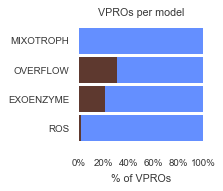

In [64]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


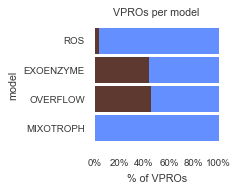

In [65]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_init_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [66]:
vcount1_df

,Versatile VPRO,Non-Versatile VPRO
ROS,1.510989,98.489011
EXOENZYME,21.060842,78.939158
OVERFLOW,30.927835,69.072165
MIXOTROPH,0.322841,99.677159


In [67]:
vpro_df['% positive'] = vpro_df.pos_interaction / vpro_df.simulations_per_VPRO

In [68]:
vpro_df.loc[vpro_df.Versatile & vpro_df.model.isin(morder) & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
EXOENZYME,135.0,0.325533,0.168378,0.010101,0.116151,0.396694,0.436932,0.555556
MIXOTROPH,4.0,0.036718,0.028489,0.011905,0.023810,0.028595,0.041503,0.077778
OVERFLOW,300.0,0.055223,0.032956,0.008547,0.028882,0.049575,0.073070,0.172932
ROS,11.0,0.371830,0.280618,0.042105,0.148166,0.280374,0.672833,0.758491


In [68]:
cdf

y_pred,Strong,Sustained,Inhibited,Weak,Neutral,Other
model,,,,,,
EXOENZYME,1.118084,18.927990,0.911546,12.517377,57.772967,8.752036
MIXOTROPH,0.000000,0.068878,5.659026,40.467269,53.465947,0.338880
OVERFLOW,0.140137,2.677954,2.923674,32.911004,59.193350,2.153882
ROS,2.664890,0.359760,1.487897,65.489674,26.151455,3.846325
EXOENZYME,2.220953,14.258993,0.000000,25.704385,40.032290,17.783378
MIXOTROPH,0.000000,0.008234,0.068619,67.254961,31.992973,0.675212
OVERFLOW,0.232245,1.649134,0.000000,58.439860,34.940182,4.738578
ROS,2.303451,0.004447,0.022234,83.195482,9.600676,4.873710
EXOENZYME,1.448420,16.576140,0.005904,20.460897,47.406227,14.102413


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'rerun_het_BP05/EXOENZYME'),
  Text(1, 0, 'rerun_het_BP05/MIXOTROPH'),
  Text(2, 0, 'rerun_het_BP05/OVERFLOW'),
  Text(3, 0, 'rerun_het_BP05/ROS'),
  Text(4, 0, 'rerun_het_BP14/EXOENZYME'),
  Text(5, 0, 'rerun_het_BP14/MIXOTROPH'),
  Text(6, 0, 'rerun_het_BP14/OVERFLOW'),
  Text(7, 0, 'rerun_het_BP14/ROS'),
  Text(8, 0, 'rerun_het_CP13/EXOENZYME'),
  Text(9, 0, 'rerun_het_CP13/MIXOTROPH'),
  Text(10, 0, 'rerun_het_CP13/OVERFLOW'),
  Text(11, 0, 'rerun_het_CP13/ROS'),
  Text(12, 0, 'rerun_het_DIN800/EXOENZYME'),
  Text(13, 0, 'rerun_het_DIN800/MIXOTROPH'),
  Text(14, 0, 'rerun_het_DIN800/OVERFLOW'),
  Text(15, 0, 'rerun_het_DIN800/ROS'),
  Text(16, 0, 'rerun_het_DOC160/EXOENZYME'),
  Text(17, 0, 'rerun_het_DOC160/MIXOTROPH'),
  Text(18, 0, 'rerun_het_DOC160/OVERFLOW'),
  Text(19, 0, 'rerun_het_DOC160/ROS')])

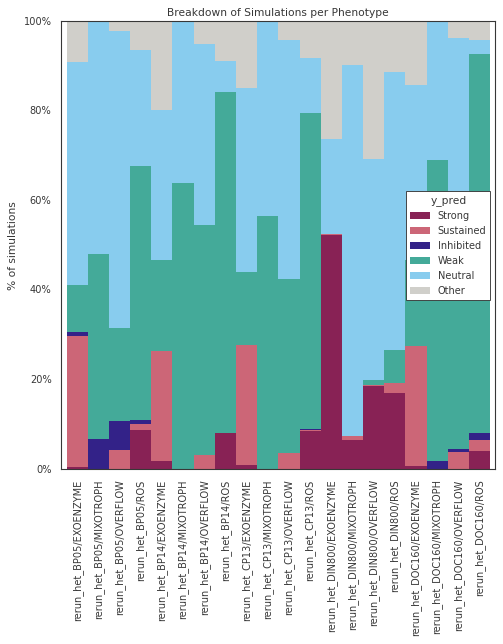

In [70]:
sns.set_context('paper')
#cdf = count_df.copy()
cdf = count_init_df[gorder].div(count_init_df[gorder].sum(axis=1), axis=0) * 100

cdf.index=count_init_df.category +'/'+ count_init_df.model 
cdf[gorder].plot(
    kind='bar', stacked=True, color=gpalette, width=1, figsize=(7,7), rot=0, lw=0.01, 
    ylabel='% of simulations', title='Breakdown of Simulations per Phenotype'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)

In [70]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [71]:
sns.set_context('paper')

model
ROS          22671.0
EXOENZYME    50890.0
OVERFLOW     61208.0
MIXOTROPH    36710.0
dtype: float64


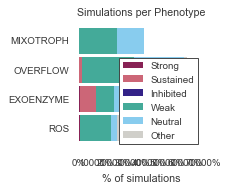

In [72]:
import matplotlib.ticker as mtick

cdf = count_df.loc[count_df['model'].isin(morder)].copy()
    
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
print(cdf[gorder].sum(axis=1))
#cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, #legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [73]:
cdf

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
model,,,,,,,,,,,,
ROS,ROS,547.0,19.0,17,17424,3634,1030.0,R,False,False,False,True
EXOENZYME,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
OVERFLOW,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
MIXOTROPH,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False


In [74]:
cdf = count_df.loc[count_df['model'].isin(morder)].copy()

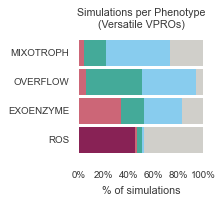

In [75]:
import matplotlib.ticker as mtick

cdf = count_ver_df.loc[count_ver_df['model'].isin(morder)].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype\n(Versatile VPROs)', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [76]:
count_init_df.loc[count_init_df.model.isin(morder)]


,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,35.0,1741.0,1,1011,2623,902.0,E,False,False,True,False
5,MIXOTROPH,0.0,0.0,0,1335,1058,0.0,M,True,False,False,False
6,OVERFLOW,5.0,182.0,14,1852,2656,192.0,O,False,True,False,False
13,ROS,190.0,11.0,1,1561,281,172.0,R,False,False,False,True


In [77]:
vcount1_df.index.name = 'model'
cdf = count_df.loc[count_df['model'].isin(morder)].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100

cdfv = count_ver_df.loc[count_ver_df['model'].isin(morder)].copy()
cdfv.index=cdfv.model
cdfv = cdfv.reindex(index=reversed(morder))
cdfv = cdfv[gorder].div(cdfv[gorder].sum(axis=1), axis=0) * 100

vcount1_df['analysis'] = 'vPros'
cdfv['analysis'] = 'Versatile'
cdf['analysis'] = 'All'

newcdf = pd.concat([cdf,cdfv,  vcount1_df, ]).reset_index().fillna(0)

newcdf

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All,0.000000,0.000000
1,EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All,0.000000,0.000000
2,OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All,0.000000,0.000000
4,ROS,45.172124,1.511335,0.000000,4.114190,1.595298,47.607053,Versatile,0.000000,0.000000
5,EXOENZYME,0.220068,33.753643,0.023791,18.622494,30.214715,17.165289,Versatile,0.000000,0.000000
6,OVERFLOW,0.330536,5.352148,0.008475,45.003814,43.418934,5.886092,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,3.821656,0.000000,17.834395,51.592357,26.751592,Versatile,0.000000,0.000000
8,ROS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,1.510989,98.489011
9,EXOENZYME,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,21.060842,78.939158


In [78]:
vcount1_init_df.index.name = 'model'
cdfi = count_init_df.loc[count_init_df['model'].isin(morder)].copy()
cdfi.index=cdfi.model
cdfi = cdfi.reindex(index=reversed(morder))
cdfi = cdfi[gorder].div(cdfi[gorder].sum(axis=1), axis=0) * 100

cdfvi = count_ver_init_df.loc[count_ver_init_df['model'].isin(morder)].copy()
cdfvi.index=cdfvi.model
cdfvi = cdfvi.reindex(index=reversed(morder))
cdfvi = cdfvi[gorder].div(cdfvi[gorder].sum(axis=1), axis=0) * 100

vcount1_init_df['analysis'] = 'vPros'
cdfvi['analysis'] = 'Versatile'
cdfi['analysis'] = 'All'

newcdfi = pd.concat([cdfi,cdfvi,  vcount1_init_df, ]).reset_index().fillna(0)

newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
1,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
2,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
4,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
5,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
6,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


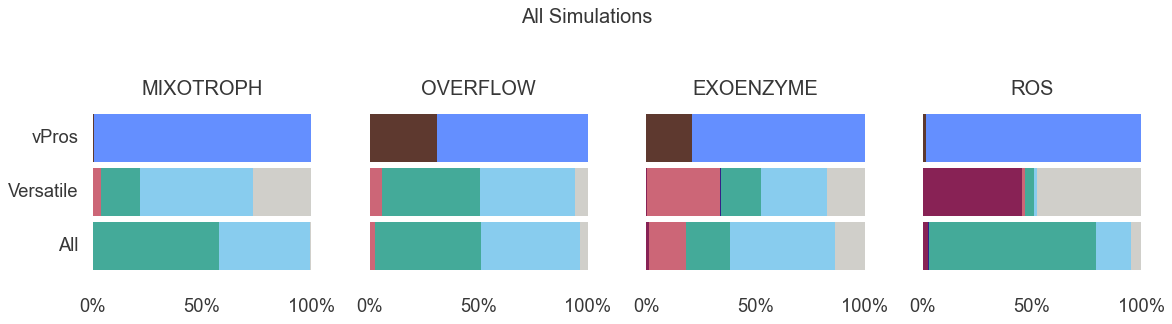

In [79]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdf.loc[newcdf.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


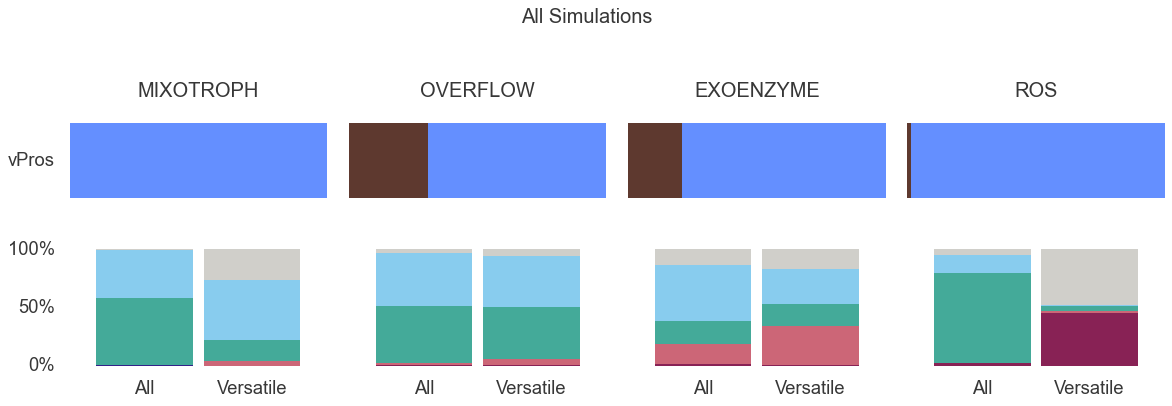

In [80]:
sns.set_context('talk')
fig, axes = plt.subplots(2,4, figsize=(15,5), sharex='row' , sharey='row')
for idx,m in enumerate(morder):
    ax=axes[0,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, #xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax=axes[1,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & ~newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title='',ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, yticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


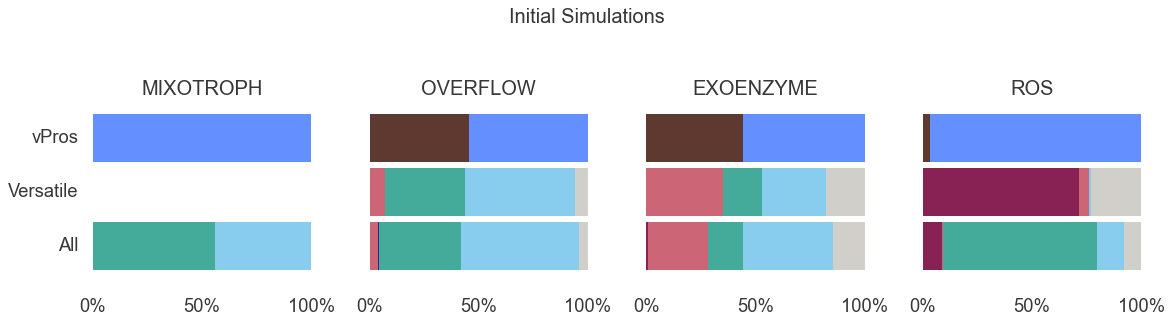

In [81]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdfi.loc[newcdfi.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('Initial Simulations', y=1.03)
plt.tight_layout()
plt.show()


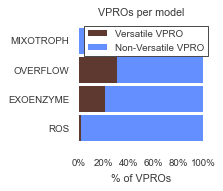

In [82]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), #legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [83]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [84]:
count_ver_df.loc[count_ver_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)


model
EXOENZYME    16813.0
MIXOTROPH      314.0
OVERFLOW     23598.0
ROS           1191.0
dtype: float64

In [85]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [86]:
count_ver_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,True,False,False,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,False,True,True,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,True,True,False,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,False,True


In [87]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [88]:
vcount_df

Versatile_STR,Versatile VPRO,Non-Versatile VPRO
MODEL,,
ERM,390,1087
OM,379,1283
EORM,347,920
OR,325,745
O,300,670
ORM,297,1073
EOR,292,734
EOM,284,1156
EO,279,857


In [89]:
vcount1_df

,Versatile VPRO,Non-Versatile VPRO,analysis
ROS,1.510989,98.489011,vPros
EXOENZYME,21.060842,78.939158,vPros
OVERFLOW,30.927835,69.072165,vPros
MIXOTROPH,0.322841,99.677159,vPros


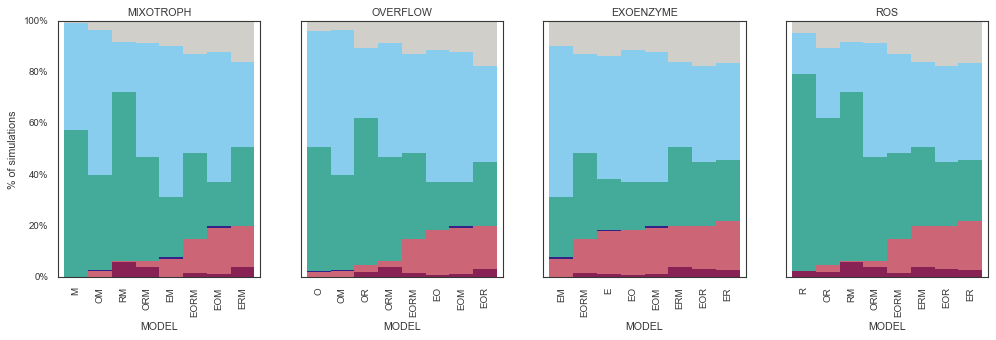

In [90]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder, axes):
    
    cdf = count_df.loc[count_df[m]].copy()
    
    cdf.index=cdf.MODEL
    cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
    cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
    cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
    cdf = cdf.sort_values(by=['pos', 'neg',])
    #cdf = cdf/ cdf[gorder].sum(axis=1)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% of simulations'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [91]:
vorder

['Versatile VPRO', 'Non-Versatile VPRO']

In [92]:
vpro_df['Versatile_STR_'] = pd.Categorical(vpro_df['Versatile_STR'], categories=reversed(vorder), ordered=True)

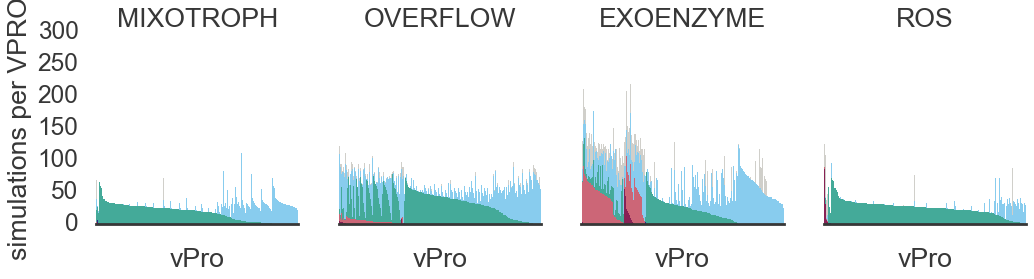

In [93]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,3), sharey=True)# , sharey=True)
for i1,m1 in enumerate(morder):
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init','extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1],) #fontsize=50)
        axes[i1].set(xticklabels=[], ylabel='simulations per VPRO', xlabel='vPro'
                    )
        axes[i1].set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [94]:
newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
1,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
2,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
4,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
5,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
6,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


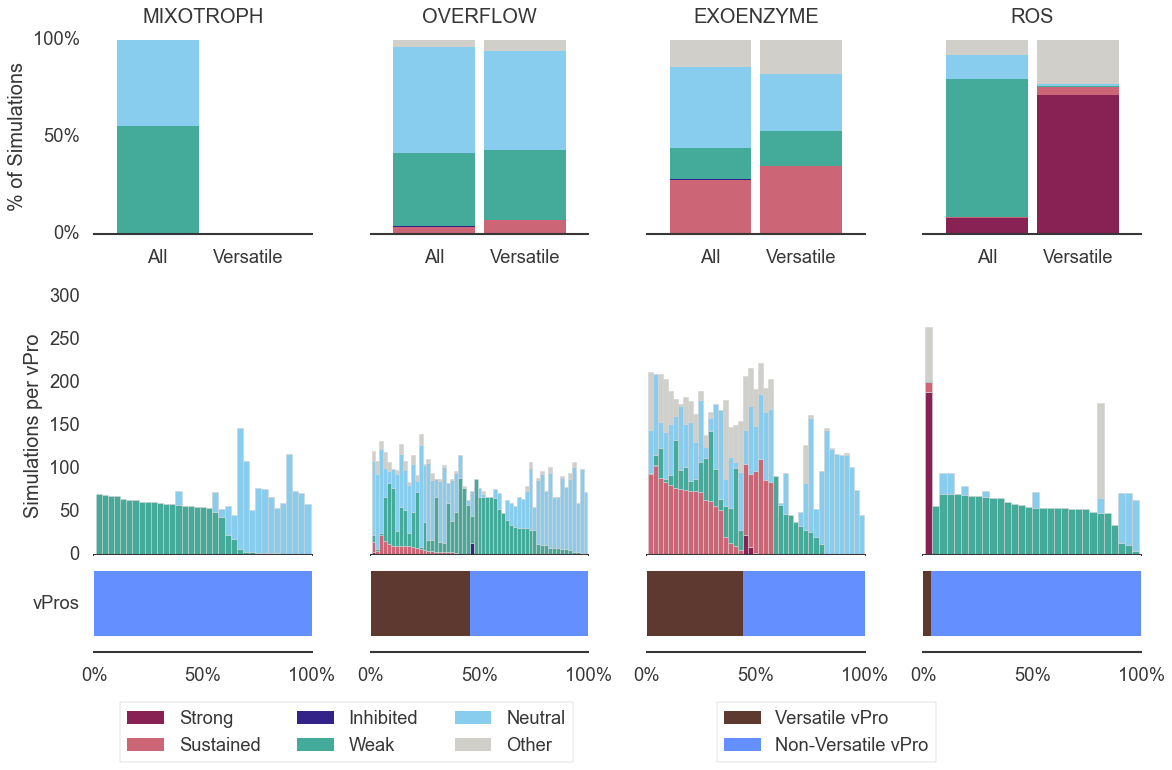

In [95]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0.5, edgecolor='#D3D3D3', rasterized=True,
               ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per vPro', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdfi.loc[newcdfi.model.isin([m1]) & newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdfi.loc[newcdfi.model.isin([m1]) & ~newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
#axes[2,1].legend(bbox_to_anchor=(0.55, -0.04),ncols=3, )


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_dict = dict(zip(labels, lines))
lines_g = [legend_dict[c] for c in gorder]
lines_v = [legend_dict[c] for c in vorder1]


sns.despine()
    
leg1 = fig.legend(lines_g, gorder, loc='lower center', ncol=3  ,  bbox_to_anchor=(0.3, -0.09))# , frameon=False)
leg2 = fig.legend(lines_v, vorder1_labels, loc='lower center', ncol=1  ,  bbox_to_anchor=(0.7, -0.09))# , frameon=False)
leg1.get_frame().set_linewidth(0.2)
leg2.get_frame().set_linewidth(0.2)
leg1.get_frame().set_edgecolor("grey")
leg2.get_frame().set_edgecolor("grey")

plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
#plt.suptitle('Initial Simulations', y=1.05)
sns.despine(left=True)
save_fpath = os.path.join(save_dpath, 'fig2_initial_simulations.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)    

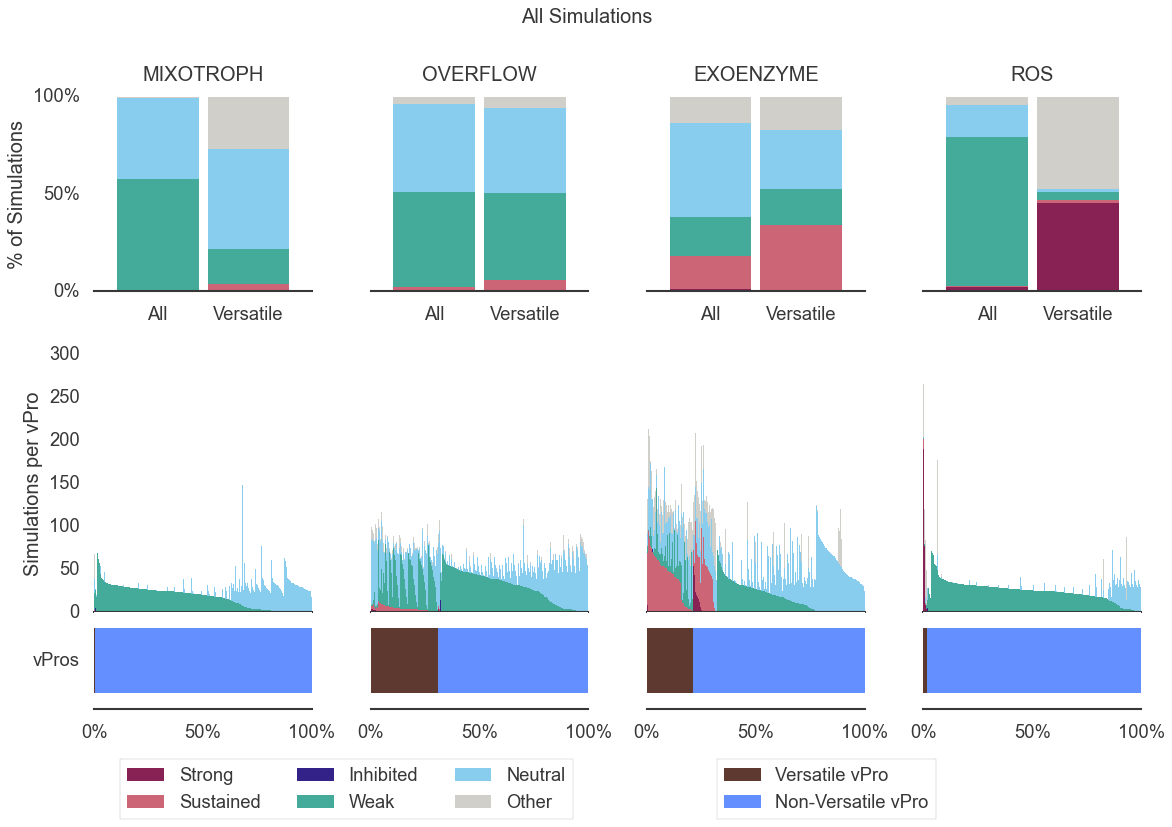

In [96]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
               rasterized=True,
             lw=0, ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per vPro', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdf.loc[newcdf.model.isin([m1]) & newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdf.loc[newcdf.model.isin([m1]) & ~newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_dict = dict(zip(labels, lines))
lines_g = [legend_dict[c] for c in gorder]
lines_v = [legend_dict[c] for c in vorder1]


sns.despine()
    
leg1 = fig.legend(lines_g, gorder, loc='lower center', ncol=3  ,  bbox_to_anchor=(0.3, -0.09))# , frameon=False)
leg2 = fig.legend(lines_v, vorder1_labels, loc='lower center', ncol=1  ,  bbox_to_anchor=(0.7, -0.09))# , frameon=False)
leg1.get_frame().set_linewidth(0.2)
leg2.get_frame().set_linewidth(0.2)
leg1.get_frame().set_edgecolor("grey")
leg2.get_frame().set_edgecolor("grey")
plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)
save_fpath = os.path.join(save_dpath, 'fig2_all_simulations.svg')
plt.savefig(save_fpath, format='svg', dpi=1200)    

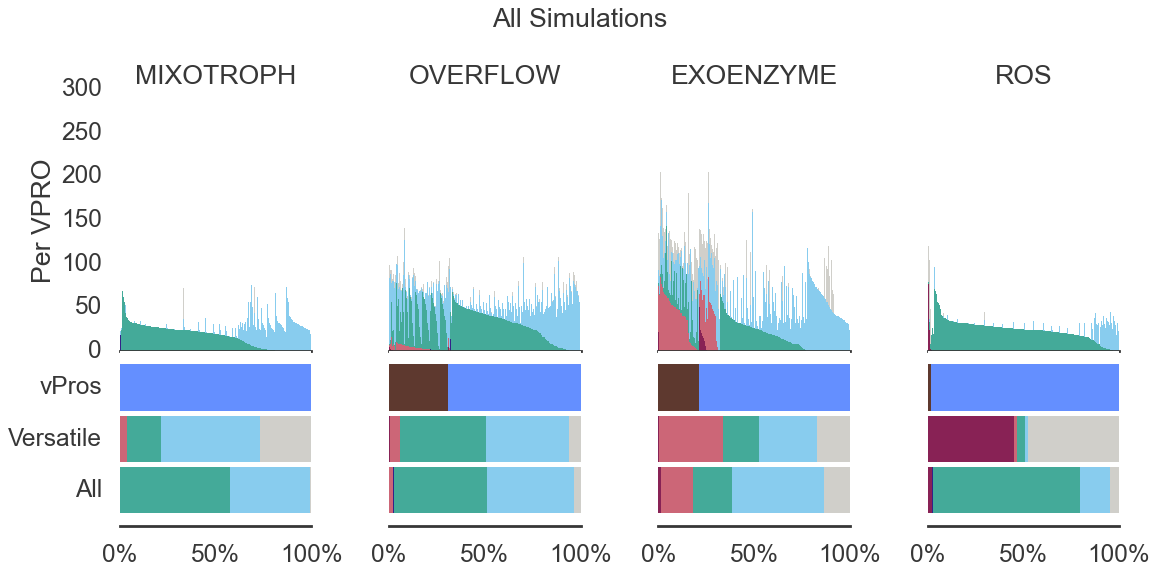

In [97]:
sns.set_context('poster')
fig, axes = plt.subplots(2,4, figsize=(15,7), sharey='row',  height_ratios=[1.5,1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[0,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.set(xticklabels=[], ylabel='Per VPRO', xlabel=''
                    )
        ax.set(title=m1)
        ax.spines.bottom.set_visible(False) 
        #ax.axis["bottom"].set_visible(False)
        ax = axes[1,i1]

        t = newcdf.loc[newcdf.model.isin([m1])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.subplots_adjust(hspace=0)
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)


In [98]:
vpro_df.loc[
    vpro_df.Versatile_STR.isin(['Versatile VPRO']) &
    #vpro_df.Inhibited.ge(1) & 
    vpro_df.Other.le(10) & 
    vpro_df.Strong.ge(3) & 
    vpro_df.Weak.ge(3) & 
    vpro_df.Sustained.ge(3) 
].sort_values(by=['% positive', 'neg_interaction']) # .VPRO.unique()#[gorder]

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile,simulations_per_VPRO,Versatile_STR,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS,% positive,Versatile_STR_
7220,OVERFLOW,extend,vpro_3_46_74_OVERFLOW_C2__63_OVERFLOW,0,75,5.0,3.0,5.0,5,8,...,True,93.0,Versatile VPRO,O,False,True,False,False,0.086022,Versatile VPRO
6665,OVERFLOW,add,vpro_2_68_32_OVERFLOW_18,0,69,8.0,5.0,3.0,4,8,...,True,89.0,Versatile VPRO,O,False,True,False,False,0.089888,Versatile VPRO
6358,OVERFLOW,add,vpro_2_22_11_OVERFLOW_98,0,76,5.0,3.0,7.0,6,10,...,True,97.0,Versatile VPRO,O,False,True,False,False,0.103093,Versatile VPRO
6624,OVERFLOW,add,vpro_2_58_32_OVERFLOW_86,0,67,10.0,6.0,6.0,13,12,...,True,102.0,Versatile VPRO,O,False,True,False,False,0.117647,Versatile VPRO
10589,OVERFLOW-MIXOTROPH,extend,vpro_3_17_13_OVERFLOW-MIXOTROPH__54_OVERFLOW-M...,0,55,6.0,3.0,10.0,10,13,...,True,84.0,Versatile VPRO,OM,True,True,False,False,0.154762,Versatile VPRO


In [99]:
example_vpro = 'vpro_3_14_37_OVERFLOW-ROS-EXOENZYME__40_OVERFLOW-ROS-EXOENZYME'
example_vpro = 'vpro_19_33_ROS_C0_1023'
example_vpro = 'vpro_2_58_32_OVERFLOW_86'


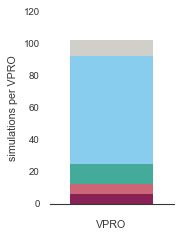

In [100]:
sns.set_context('paper')
fig, ax = plt.subplots(1,1, figsize=(2,3), sharey=True)# , sharey=True)
tmpdf =vpro_df.loc[vpro_df.VPRO.isin([example_vpro])] #.sample(300) # .head(500)
#tmpdf.index = tmpdf.VPRO
tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
t=tmpdf[gorder]
#t = t.sort_values(by=gorder, ascending=False)

#_wedges, labels, percentages = 
t.plot(kind='bar', stacked=True, legend=False,
     rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
     lw=0, ax=ax,) #fontsize=50)
ax.set(xticklabels=[], ylabel='simulations per VPRO', xlabel='VPRO'
            )
#ax.set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [101]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'MIXOTROPH',
       'OVERFLOW', 'EXOENZYME', 'ROS', '% positive', 'Versatile_STR_'],
      dtype='object')

In [102]:
gorder1 = gorder[0:4]
gpalette1 = gpalette[0:4]

gorder1

['Strong', 'Sustained', 'Inhibited', 'Weak']

In [103]:
for i in gorder1:
    vpro_df[f'% {i}'] = vpro_df[i].div(vpro_df[gorder].sum(axis=1))*100

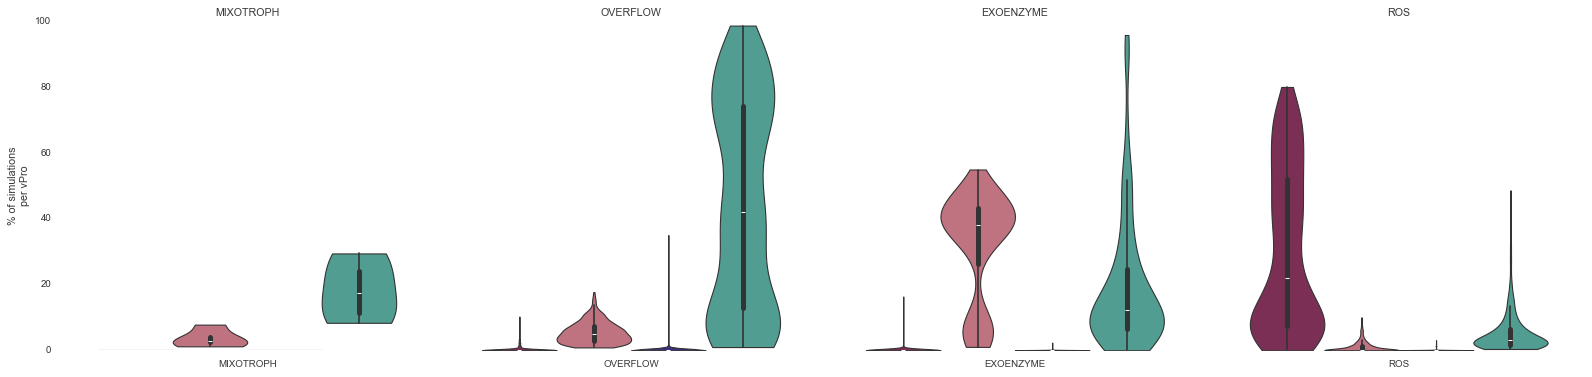

In [104]:
ylabel='% of simulations\nper vPro'
data = vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile
    ].melt(
        id_vars=['VPRO', 'model'], 
        value_vars=[f'% {i}' for i in gorder1],
        value_name=ylabel,
        var_name='y_pred'
    )
data['y_pred'] = data['y_pred'].map({f'% {i}':i for i in gorder1})

sns.catplot(
    data=data,
    col='model', col_order=morder, 
    x='model', sharex=False,#dodge=False,
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    y=ylabel,
    kind='violin', cut=0,
    legend=False,
).set_titles(col_template='{col_name}').set(xlabel='')
sns.despine(bottom=True, left=True)

In [105]:
data

,VPRO,model,y_pred,% of simulations\nper vPro
0,vpro_11_62_EXOENZYME_C1_20,EXOENZYME,Strong,0.000000
1,vpro_11_62_EXOENZYME_C1_46,EXOENZYME,Strong,0.000000
2,vpro_11_62_EXOENZYME_C1_54,EXOENZYME,Strong,0.000000
3,vpro_11_62_EXOENZYME_C1_70,EXOENZYME,Strong,0.000000
4,vpro_11_62_EXOENZYME_C1_98,EXOENZYME,Strong,0.000000
...,...,...,...,...
5071,vpro_2_19_33_ROS_C0_962_85_ROS,ROS,Weak,10.975610
5072,vpro_2_19_33_ROS_C0_962_9_ROS,ROS,Weak,7.042254
5073,vpro_2_19_33_ROS_C0_980_17_ROS,ROS,Weak,13.333333
5074,vpro_2_19_33_ROS_C0_980_32_ROS,ROS,Weak,7.894737


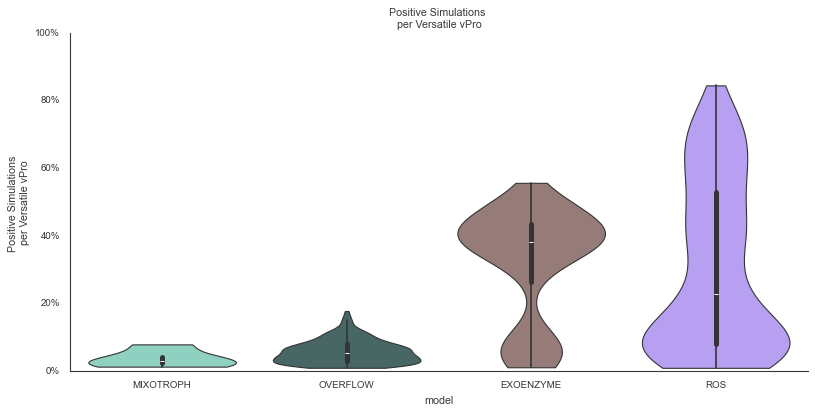

In [106]:
import matplotlib.ticker as mtick

g = sns.catplot(
    data=vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile],
    x='model', order=morder, 
    hue='model', hue_order=morder, palette=mpalette,
    y='% positive',
    kind='violin', cut=0,
    aspect=2,
)
g.set(ylabel='Positive Simulations \nper Versatile vPro', ylim=(0,1), title='Positive Simulations \nper Versatile vPro',)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))


In [109]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].agg(['mean', 'std'])

,mean,std
model,,
EXOENZYME,0.325533,0.168378
MIXOTROPH,0.036718,0.028489
OVERFLOW,0.055223,0.032956
ROS,0.371830,0.280618


In [110]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile & vpro_df.Phase.isin(['init', ])].groupby('model')['% positive'].agg(['mean', 'std'])


,mean,std
model,,
EXOENZYME,0.342716,0.147140
OVERFLOW,0.069084,0.043668
ROS,0.758491,NaN


In [111]:
vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile ].groupby('model')['% positive'].agg(['mean', 'std'])


,mean,std
model,,
EXOENZYME,0.323363,0.161613
MIXOTROPH,0.036718,0.028489
OVERFLOW,0.057428,0.034259
ROS,0.308737,0.250963
